In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
dataf = pd.read_csv('Mobile_Dataset.csv')

In [3]:
dataf


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
dataset = dataf.values

In [5]:
X = dataset[:,0:20]

In [6]:
Y = dataset[:,20]

In [7]:
#dataPreprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(X)

In [8]:
x_scale

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [9]:
y = dataf['price_range']

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(x_scale, y, test_size=0.2 , random_state=40)

In [11]:
X_val_and_test

array([[7.88243153e-01, 1.00000000e+00, 8.00000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [6.48630595e-01, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.68002672e-04, 0.00000000e+00, 1.20000000e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.91048764e-01, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.29926520e-01, 0.00000000e+00, 4.00000000e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [9.77955912e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1600, 20) (200, 20) (200, 20) (1600,) (200,) (200,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

model = Sequential([
 Dense(15, activation="relu", input_shape=(20,)),
 Dense(32,activation='relu'),
 Dense(4,activation='softmax')
])
model.compile(
   loss = SparseCategoricalCrossentropy(),
   optimizer = Adam(),
   metrics="accuracy")

In [15]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
50/50 [==============================] - 4s 6ms/step - loss: 1.4053 - accuracy: 0.2587
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 1.3718 - accuracy: 0.2981
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 1.3505 - accuracy: 0.3444
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 1.3127 - accuracy: 0.3881
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 1.2342 - accuracy: 0.4519
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 1.1074 - accuracy: 0.5494
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.9615 - accuracy: 0.6244
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.8293 - accuracy: 0.6975
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7264 - accuracy: 0.7469
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.7819
Epoch 11/

In [16]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1533 - accuracy: 0.9250


[0.15333625674247742, 0.925000011920929]

In [17]:
# creates an array of predictions from a matrix of percentages of classifications
def predictionrelease(preds):
    arr=[]
    for i in range(0,len(preds)):
        ans=np.argmax(preds[i])
        arr.append(ans)
    len(arr)
    return arr

In [18]:
#testing of the cross value sets
preds_test = model.predict(X_test)      
test_preds = predictionrelease(preds_test)

7/7 [==============================] - 0s 2ms/step


In [19]:
from sklearn.metrics import classification_report,confusion_matrix
#cross validation
print(classification_report(Y_test,test_preds)) 


              precision    recall  f1-score   support

           0       0.98      0.94      0.96        48
           1       0.91      0.98      0.95        53
           2       0.92      0.87      0.90        54
           3       0.89      0.91      0.90        45

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



In [20]:
#KNN model
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [21]:
mobileData = pd.read_csv('Mobile_Dataset.csv')

In [22]:
mobileData.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [23]:
mobileData.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [24]:
mobileData.shape

(2000, 21)

In [25]:
mobileData.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [26]:
pd.isnull(mobileData).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [27]:
#data preprosseing
mobileData.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [28]:
Y_Values = mobileData['price_range']
X_Values = mobileData.drop('price_range', axis = 1)

In [29]:
Y_Values.unique()

array([1, 2, 3, 0], dtype=int64)

In [30]:
xtrain, xvalid, ytrain, yvalid = train_test_split(X_Values, Y_Values, test_size = 0.2, random_state = 65)

In [31]:
print(xtrain.shape)
print(xvalid.shape)

(1600, 20)
(400, 20)


In [32]:
modelKnn = KNeighborsClassifier(n_neighbors=5)  
modelKnn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [33]:
yPredictKnn = modelKnn.predict(xvalid) 

In [34]:
print(yPredictKnn)

[1 0 3 3 0 1 3 3 3 1 1 1 2 2 2 0 3 1 1 3 2 2 0 1 1 3 2 1 3 1 1 0 3 1 0 1 0
 3 3 2 0 0 3 1 3 0 0 2 0 2 3 0 2 0 1 2 2 1 1 0 0 0 3 2 0 1 1 2 2 1 2 2 2 3
 2 0 2 2 0 1 3 0 2 2 3 2 1 2 1 1 3 0 3 0 1 1 2 2 2 2 3 0 0 2 1 2 2 0 3 0 2
 2 0 0 2 0 2 2 1 0 3 3 3 1 0 3 2 3 3 3 2 3 1 1 1 1 0 1 2 1 3 2 1 1 3 2 2 3
 2 0 1 3 0 0 2 1 3 2 1 1 0 0 0 2 2 2 3 2 1 2 0 0 3 3 0 0 3 0 0 2 3 3 1 0 0
 3 3 2 2 2 2 3 3 2 3 1 1 0 2 2 3 0 0 1 3 3 2 2 2 3 0 1 0 0 0 1 1 2 1 3 2 1
 0 2 2 0 1 1 3 3 0 0 2 1 2 2 0 1 3 3 3 1 1 0 0 1 1 3 0 1 0 0 0 2 3 3 3 2 2
 1 2 2 3 3 3 2 0 2 3 2 1 3 3 2 0 3 3 3 3 1 3 3 2 0 3 2 3 2 3 0 1 1 2 0 2 3
 0 0 3 3 3 2 0 2 0 1 0 0 1 3 3 0 1 1 2 3 2 2 3 3 0 3 0 3 1 2 2 0 2 0 1 3 1
 2 1 0 1 3 2 1 1 1 0 2 0 0 2 1 2 2 1 2 2 3 2 2 3 1 3 0 3 3 3 1 0 3 2 2 2 2
 0 2 0 0 2 3 1 2 2 3 3 2 2 2 3 2 2 1 0 1 0 1 3 0 1 1 0 2 0 1]


In [35]:
print(metrics.confusion_matrix( yvalid,yPredictKnn ))

[[ 91   4   0   0]
 [  4  79   3   0]
 [  0   6 102   8]
 [  0   0  10  93]]


In [36]:
print(accuracy_score(yvalid,yPredictKnn)) 

0.9125


In [37]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(xtrain, ytrain)
model.best_params_

{'n_neighbors': 23}

In [38]:
#neighbors k = 23
model_knn = KNeighborsClassifier(n_neighbors=23)  
model_knn.fit(xtrain, ytrain) 

KNeighborsClassifier(n_neighbors=23)

In [39]:
print(metrics.confusion_matrix(yvalid, yPredictKnn)) 

[[ 91   4   0   0]
 [  4  79   3   0]
 [  0   6 102   8]
 [  0   0  10  93]]


In [40]:
acc_knn = accuracy_score(yvalid,yPredictKnn )

In [41]:
acc_knn

0.9125

In [42]:
#Comparison of the two models
import matplotlib.pyplot as plt

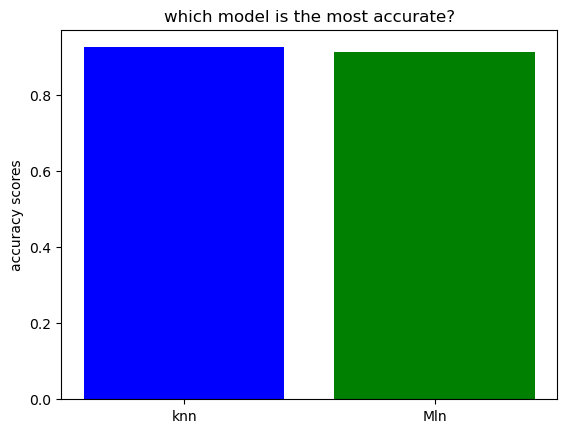

In [43]:
models = ['knn','Mln']
acc_scores = [0.9250,0.9125]

plt.bar(models,acc_scores,color=['blue','green'])
plt.ylabel("accuracy scores")
plt.title("which model is the most accurate?")
plt.show()